**1. Perceptron learning algorithm**

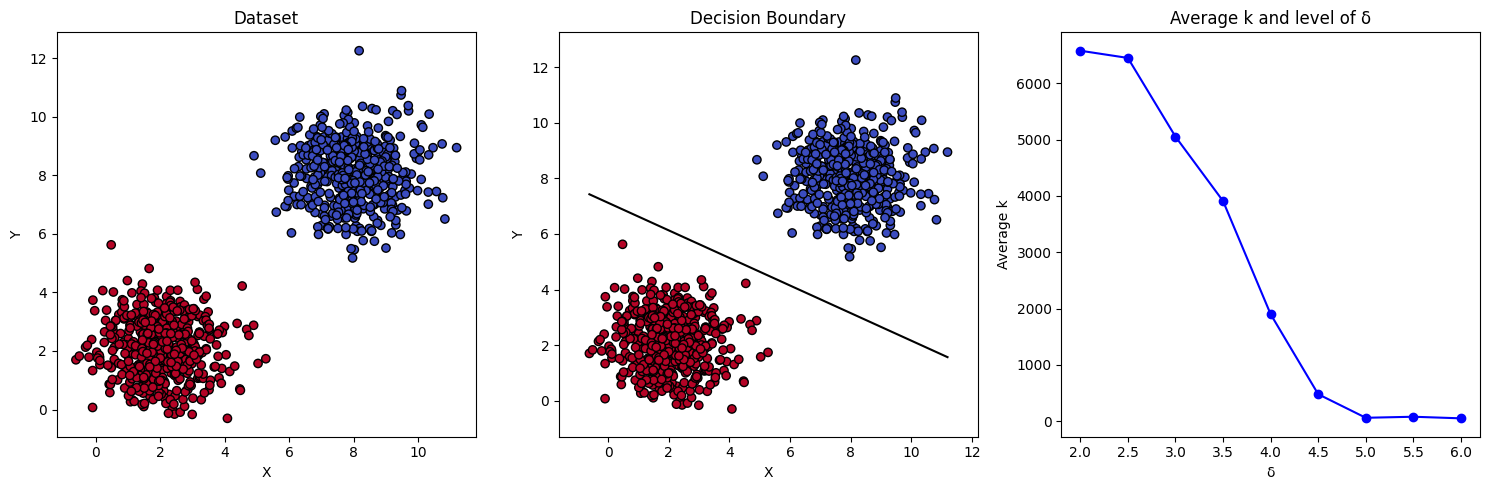

In [2]:
# Importing required library
import numpy as np
import matplotlib.pyplot as plt

# Defining function that generates linearly seperable dataset
# with different seperability.
def generate_data(separability):
    # Initalizing the required number of points
    num_points = 500

    # Initializing mean of two clusters seperated by separability.
    mean1 = [2, 2]
    mean2 = [2 + separability, 2 + separability]
    cov = [[1, 0], [0, 1]]

    # Generating dataset for both clusters using random multivariate_normal.
    cluster1 = np.random.multivariate_normal(mean1, cov, num_points)
    cluster2 = np.random.multivariate_normal(mean2, cov, num_points)

    # Concatenating both cluster that gives an overall linearly seperable dataset.
    data = np.concatenate((cluster1, cluster2), axis=0)

    # Generating positive and negative label for each cluster.
    label = np.concatenate((np.ones(num_points), -np.ones(num_points)))

    # Returing generated data.
    return data, label

# Defining function to train perceptron.
def perceptron_train(data, label, learning_rate = 0.01, num_epochs = 1000):
    # Retriving number of samples and features in the dataset.
    num_samples, num_features = data.shape

    # Initializing parameters and variables.
    weights = np.zeros(num_features)
    bias = 0
    iter = 0
    misclassified_count = 0


    for epoch in range(num_epochs):
        # misclassified_count = 0
        # iterating each data point
        for i in range(num_samples):
            # predicting the label of data point
            prediction = np.dot(data[i], weights) + bias

            # Updating weights and bias if the data point if it is not correctly
            # classified. Count variables are also updated.
            if label[i] == 1 and prediction < 0.0:
                weights += learning_rate *  data[i]
                bias += learning_rate
                misclassified_count += 1

            if label[i] == -1 and prediction >= 0.0:
                weights -= learning_rate *  data[i]
                bias -= learning_rate
                misclassified_count += 1

        iter = iter + 1
    # Returning learned weight, bias and iteartion counts
    return weights, bias, iter, misclassified_count

def predict(X, weights, bias):
    return np.sign(np.dot(X, weights) + bias)

# Defining function to plot decision boundry based on weight and bias learned from the model.
def plot_decision_line(data, label, weights, bias):
    # Finding slope and intercept of decision line
    slope = -weights[0] / weights[1]
    intercept = -bias / weights[1]

    # Plotting data points
    plt.scatter(data[:, 0], data[:, 1], c=label, cmap=plt.cm.coolwarm, marker='o', edgecolors='k')
    x_values = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 100)
    # Plotting decision line
    plt.plot(x_values, slope * x_values + intercept, color='k')
    # Scaling the graph for consistent representation of graphs.
    plt.ylim(np.min(data[:, 1])-1, np.max(data[:, 1])+1)
    plt.xlim(np.min(data[:, 0])-1, np.max(data[:, 0])+1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Decision Boundary')

# main function
if __name__ == '__main__':

    # Defining list of seperability and a list to store corresponding counts.
    separability = [2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
    iteration_count = []

    # Iterating and finding average number of iteration for different seperability.
    for gamma in separability:
        temp = 0
        i = len(separability)
        while(i):
            # Generating dataset
            data, label = generate_data(gamma)
            # Training model
            weights, bias, iter, misclassified_count = perceptron_train(data, label)
            temp = temp + misclassified_count
            i = i -1
        # finding average number of iteration.
        average_iter = temp/len(separability)
        iteration_count.append(average_iter)

    # Plotting the one of the original dataset generated.
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.scatter(data[:, 0], data[:, 1], c=label, cmap=plt.cm.coolwarm, marker='o', edgecolors='k')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Dataset')

    # Plotting the decision boundry learned by model for corresponding dataset.
    plt.subplot(1, 3, 2)
    plot_decision_line(data, label, weights, bias)

    # Plotting the graph between seperability and average number of iterations to perfectly classify.
    plt.subplot(1, 3, 3)
    plt.plot(separability, iteration_count, marker='o', color='b', linestyle='-')
    plt.xlabel('δ')
    plt.ylabel('Average k')
    plt.title('Average k and level of δ')

    plt.tight_layout()
    plt.show()


Observations on number of iteration to prefectly classify the dataset:

*   From the above graph we can see that as the level of seperability(δ) increases then the average number of iterations(k) required to perfectly classify the dataset also increases.
*   We can observe that when the seperability is low then it takes large number of iteration to classify the data.
*   After ceratin extent of seperability the number of iteration keeps very low and constant to prefectly classify the data.






**2. Gradient descent for training a linear classifier**

In the modification of first problem I am using cross-entropy as loss function. I cosider it as suitable for loss functionn as cross-entropy is mostly used for classification problem, and here also we are classifing dataset into two subsets.

Below show the setp by step code for loss formulation, gradient computation, and update equation

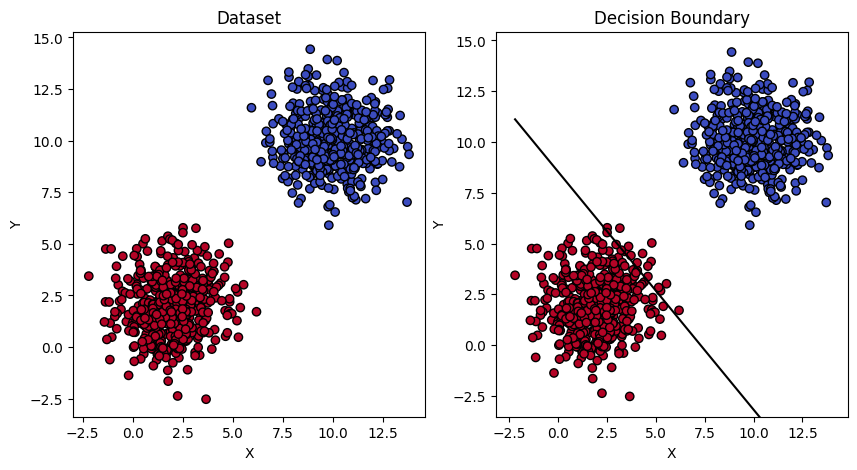

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Defining function to findBinary cross-entropy loss function
def binary_cross_entropy_loss(X, y, weights, bias):
    # Calculating input to node
    node_inp = np.dot(X, weights) + bias
    # Finding the loss
    loss = -np.mean(y * np.log(1/(1 + np.exp(-node_inp))) + (1 - y) * np.log(1 - 1/(1 + np.exp(-node_inp))))
    return loss

# Defining function to calculate Gradient.
def binary_cross_entropy_loss_gradient(X, y, weights, bias):
    # Calculating input to node
    node_inp = np.dot(X, weights) + bias
    # Calculatingg the predicted label.
    y_pred = 1 / (1 + np.exp(-node_inp))

    # Updating weights and bias.
    grad_weights = np.dot(X.T, (y_pred - y)) / len(X)
    grad_bias = np.mean(y_pred - y)

    return grad_weights, grad_bias

# Defining function for updating weights and bias.
def gradient_descent_update(X, y, weights, bias, learning_rate):
    grad_weights, grad_bias = binary_cross_entropy_loss_gradient(X, y, weights, bias)

    # Updating weights and bias
    weights -= learning_rate * grad_weights
    bias -= learning_rate * grad_bias
    return weights, bias

# Defining function to train model.
def train_linear_classifier(data, label, learning_rate=0.01, num_epochs=1000, tolerance=0.0001):
    # Retriving number of samples and features in the dataset.
    num_samples, num_features = data.shape

    # Initializing parameters and variables.
    weights = np.zeros(num_features)
    bias = 0

    for epoch in range(num_epochs):
        # Computing loss
        loss = binary_cross_entropy_loss(data, label, weights, bias)

        # Checking convergence
        if loss < tolerance:
            break

        # Updating weights and bias
        weights, bias = gradient_descent_update(data, label, weights, bias, learning_rate)

    return weights, bias

# Generating dataset for both clusters using random multivariate_normal.
def generate_dataset(separability):
    # Initalizing the required number of points
    num_points = 500

    # Initializing mean of two clusters seperated by separability.
    mean1 = [2, 2]
    mean2 = [2 + separability, 2 + separability]
    cov = [[2, 0], [0, 2]]

    # Generating dataset for both clusters using random multivariate_normal.
    cluster1 = np.random.multivariate_normal(mean1, cov, num_points)
    cluster2 = np.random.multivariate_normal(mean2, cov, num_points)

    # Concatenating both cluster that gives an overall linearly seperable dataset.
    data = np.concatenate((cluster1, cluster2), axis=0)

    # Generating positive and negative label for each cluster.
    label = np.concatenate((np.ones(num_points), np.zeros(num_points)))

    return data, label

# Plot decision boundary
def plot_decision_line(X, y, weights, bias):
    # Finding slope and intercept of decision line
    slope = -weights[0] / weights[1]
    intercept = -bias / weights[1]

    # Plotting data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o', edgecolors='k')
    x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    # Plotting decision line
    plt.plot(x_values, slope * x_values + intercept, color='k')
    # Scaling the graph for consistent representation of graphs.
    plt.ylim(np.min(data[:, 1])-1, np.max(data[:, 1])+1)
    plt.xlim(np.min(data[:, 0])-1, np.max(data[:, 0])+1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Decision Boundary')
    plt.show()

if __name__ == '__main__':
    separability = 8

    # Generating dataset
    data, label = generate_dataset(separability)

    # Plotting the one of the original dataset generated.
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(data[:, 0], data[:, 1], c=label, cmap=plt.cm.coolwarm, marker='o', edgecolors='k')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Dataset')

    # Train linear classifier using gradient descent
    weights, bias = train_linear_classifier(data, label)
    plt.subplot(1, 2, 2)
    # Plotting the decision boundry learned by model
    plot_decision_line(data, label, weights, bias)


3. MLP with a single hidden layer

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Defining Parameters for data generation.
num_points = 1000
radius1 = 5
center1 = (0, 0)
radius2 = 7
center2 = (0, 0)

# Generating points for the first circle.
theta1 = np.random.uniform(0, 2*np.pi, size=(num_points//2,))
r1 = np.random.uniform(0, radius1, size=(num_points//2,))
x1 = center1[0] + r1 * np.cos(theta1)
y1 = center1[1] + r1 * np.sin(theta1)

# Generating points for the second circle.
theta2 = np.random.uniform(0, 2*np.pi, size=(num_points//2,))
r2 = np.random.uniform(radius2, radius2+2, size=(num_points//2,))
x2 = center2[0] + r2 * np.cos(theta2)
y2 = center2[1] + r2 * np.sin(theta2)

# Concatenating both cluster that gives an overall linearly seperable dataset.
X = np.concatenate((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T), axis=0)
y = np.concatenate((np.ones(num_points//2), -1*np.ones(num_points//2)))

# Shuffling tha data.
shuffle_idx = np.random.permutation(num_points)
X = X[shuffle_idx]
y = y[shuffle_idx]

# Adding bias term to the input.
X = np.column_stack([X, np.ones(X.shape[0])])

# Initializing parameters and variables.
input_dim = X.shape[1]
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
num_epochs = 400

# Initializing weights
np.random.seed(0)
W1 = np.random.randn(input_dim, hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)

# Defining the sigmoid activation function
def sigmoid(value):
    return 1 / (1 + np.exp(-value))

# Defining the cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    # Finding predicted label.
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    # Finding value of loss
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Training the network to classify data.
for epoch in range(num_epochs):

    # Forward pass
    hidden_layer_input = np.dot(X, W1)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, W2)
    output_layer_output = sigmoid(output_layer_input)

    # Computing the cross-entropy loss
    loss = cross_entropy_loss(y, output_layer_output)

    # Backward pass
    grad_output = output_layer_output - y.reshape(-1, 1)
    grad_W2 = np.dot(hidden_layer_output.T, grad_output)
    grad_hidden = np.dot(grad_output, W2.T) * (hidden_layer_output * (1 - hidden_layer_output))
    grad_W1 = np.dot(X.T, grad_hidden)

    # Updating weights
    W1 -= learning_rate * grad_W1
    W2 -= learning_rate * grad_W2

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")


Epoch 0, Loss: 0.5569114704383906
Epoch 100, Loss: 0.34076737636010607
Epoch 200, Loss: 0.23524078495004
Epoch 300, Loss: 0.13080501255314625


In the above classification problem of data that is not linearly seperable using mlp having one hidden layer, the loss keep on decreasing up to certain extent but then starts to increase. Considering the model not gets overfitted I stopped training after 400 epochs.